### 1) In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv('nba_2013.csv', usecols=['pos', 'g', 'gs', 'pts'])
data.head()

,pos,g,gs,pts
0,SF,63,0,171
1,C,81,20,265
2,PF,53,12,362
3,SG,73,73,1330
4,C,56,30,328


In [29]:
data.describe()

,g,gs,pts
count,481.000000,481.000000,481.000000
mean,53.253638,25.571726,516.582121
std,25.322711,29.658465,470.422228
min,1.000000,0.000000,0.000000
25%,32.000000,0.000000,115.000000
50%,61.000000,10.000000,401.000000
75%,76.000000,54.000000,821.000000
max,83.000000,82.000000,2593.000000


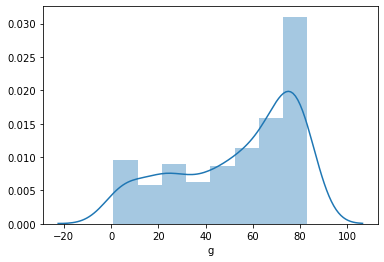

In [35]:
sns.distplot(data['g'])

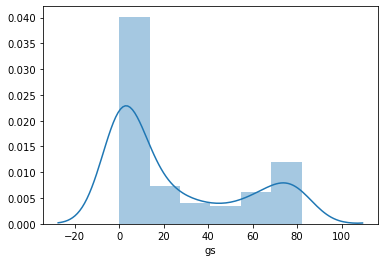

In [36]:
sns.distplot(data['gs'])

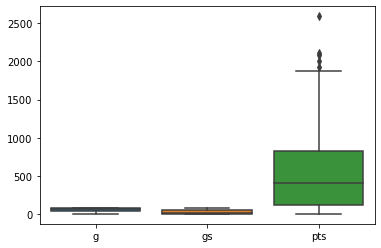

In [37]:
sns.boxplot(data=data)

In [41]:
pos_dummy = pd.get_dummies(data['pos'], prefix='pos', drop_first=True)

In [58]:
new_data = pd.concat([data, pos_dummy], axis=1)
new_data.head()

,pos,g,gs,pts,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,SF,63,0,171,0,0,0,0,1,0
1,C,81,20,265,0,0,0,0,0,0
2,PF,53,12,362,0,0,1,0,0,0
3,SG,73,73,1330,0,0,0,0,0,1
4,C,56,30,328,0,0,0,0,0,0


In [59]:
x = new_data.drop(['pos', 'pts'], axis=1)
y = new_data['pts']

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [66]:
x_scaled.shape[1]

8

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif['columns'] = x.columns

In [70]:
vif

,VIF,columns
0,1.631996,g
1,1.609761,gs
2,1.017693,pos_F
3,1.016287,pos_G
4,1.665945,pos_PF
5,1.604089,pos_PG
6,1.673351,pos_SF
7,1.716534,pos_SG


In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)

In [74]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [79]:
y_pred = knn.predict(x_test)

In [80]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.6993997004668009

### 2) In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class 

In [81]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets

In [89]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(url, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [93]:
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
x = data.iloc[:,:4]
y = data.iloc[:, 4]

In [117]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

In [118]:
df = pd.concat([principal_df, data['target']], axis=1)
df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,target
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa


In [126]:
df['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [119]:
x_valz = df['Principal Component 1']
y_valz = df['Principal Component 2']
z_valz = df['Principal Component 3']

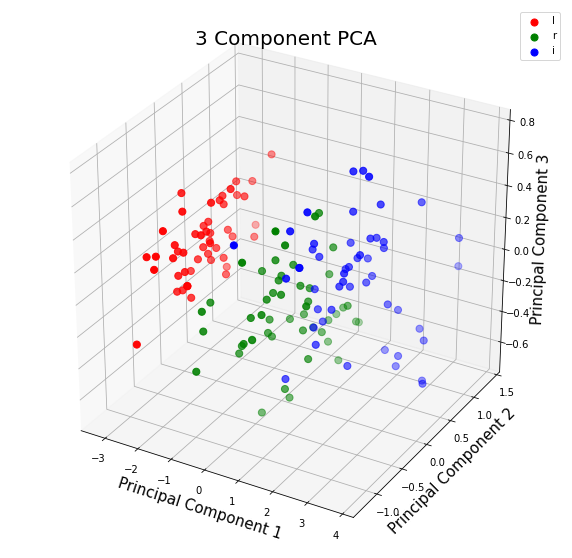

In [151]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15)
ax.set_title('3 Component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for targets, colors in zip(targets, colors):
    indicesToKeep = df['target'] == targets
    ax.scatter(df.loc[indicesToKeep, 'Principal Component 1'], 
              df.loc[indicesToKeep, 'Principal Component 2'],
              df.loc[indicesToKeep, 'Principal Component 3'], 
              c = colors,
              s=50)
ax.legend(targets)
ax.grid()
plt.show()